In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
data = pd.read_csv('C:/Users/Rustam/Desktop/Учеба/ИИ БД Этика/top-500-movies.csv')
data.head()

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0


In [6]:
data.describe()

,rank,production_cost,domestic_gross,worldwide_gross,opening_weekend,theaters,runtime,year
count,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,4.790000e+02,479.000000,487.000000,499.000000
mean,250.500000,1.494954e+08,1.696114e+08,4.697776e+08,5.429206e+07,3659.770355,121.885010,2011.394790
std,144.481833,4.774040e+07,1.421642e+08,3.850620e+08,4.619796e+07,546.018902,22.399642,6.560688
min,1.000000,9.100000e+07,0.000000e+00,0.000000e+00,4.855800e+04,30.000000,76.000000,1991.000000
25%,125.750000,1.100000e+08,7.047110e+07,2.122188e+08,2.421873e+07,3378.500000,104.500000,2007.000000
50%,250.500000,1.400000e+08,1.318470e+08,3.671458e+08,4.167120e+07,3735.000000,120.000000,2012.000000
75%,375.250000,1.750000e+08,2.185998e+08,6.484251e+08,6.812391e+07,4065.000000,135.000000,2016.000000
max,500.000000,4.000000e+08,9.366622e+08,2.910371e+09,3.571150e+08,4802.000000,210.000000,2023.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             500 non-null    int64  
 1   release_date     499 non-null    object 
 2   title            500 non-null    object 
 3   url              500 non-null    object 
 4   production_cost  500 non-null    int64  
 5   domestic_gross   500 non-null    int64  
 6   worldwide_gross  500 non-null    int64  
 7   opening_weekend  479 non-null    float64
 8   mpaa             492 non-null    object 
 9   genre            495 non-null    object 
 10  theaters         479 non-null    float64
 11  runtime          487 non-null    float64
 12  year             499 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 50.9+ KB


In [8]:
data['worldwide_gross'] = data['worldwide_gross'].replace(0, 
    data['worldwide_gross'].mean())

In [9]:
data.describe()

,rank,production_cost,domestic_gross,worldwide_gross,opening_weekend,theaters,runtime,year
count,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,4.790000e+02,479.000000,487.000000,499.000000
mean,250.500000,1.494954e+08,1.696114e+08,4.772940e+08,5.429206e+07,3659.770355,121.885010,2011.394790
std,144.481833,4.774040e+07,1.421642e+08,3.803656e+08,4.619796e+07,546.018902,22.399642,6.560688
min,1.000000,9.100000e+07,0.000000e+00,7.561500e+04,4.855800e+04,30.000000,76.000000,1991.000000
25%,125.750000,1.100000e+08,7.047110e+07,2.186490e+08,2.421873e+07,3378.500000,104.500000,2007.000000
50%,250.500000,1.400000e+08,1.318470e+08,3.778758e+08,4.167120e+07,3735.000000,120.000000,2012.000000
75%,375.250000,1.750000e+08,2.185998e+08,6.484251e+08,6.812391e+07,4065.000000,135.000000,2016.000000
max,500.000000,4.000000e+08,9.366622e+08,2.910371e+09,3.571150e+08,4802.000000,210.000000,2023.000000


Text(0, 0.5, 'Кассовые сборы')

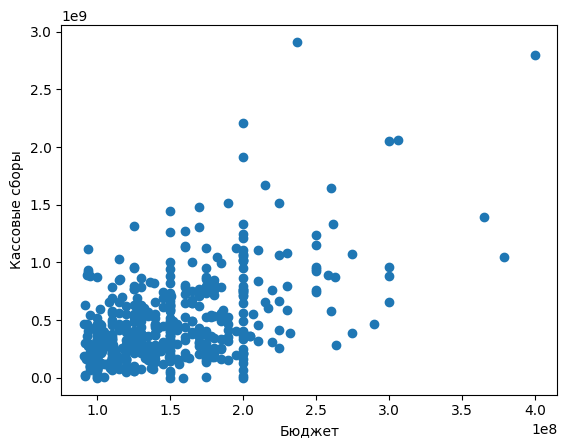

In [10]:
plt.scatter(data.production_cost, data.worldwide_gross)
plt.xlabel('Бюджет')
plt.ylabel('Кассовые сборы')

In [11]:
model = LinearRegression()

In [12]:
X = pd.DataFrame(data.production_cost)
y = pd.DataFrame(data.worldwide_gross)

In [13]:
model.fit(X, y)

LinearRegression()

In [14]:
model.coef_

array([[4.30606644]])

Text(0, 0.5, 'Кассовые сборы')

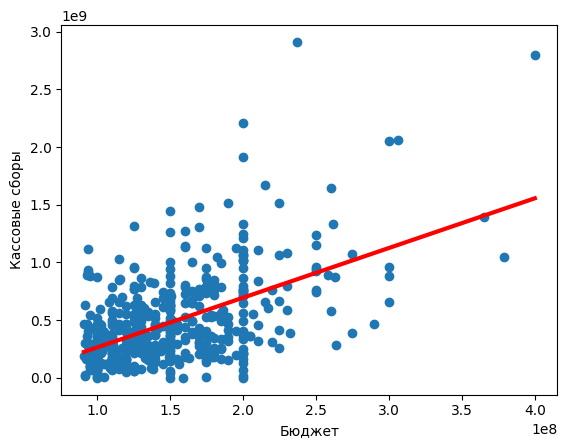

In [15]:
plt.scatter(data.production_cost, data.worldwide_gross)
plt.plot(X, model.predict(X), color = 'red', linewidth = 3)
plt.xlabel('Бюджет')
plt.ylabel('Кассовые сборы')

In [16]:
model.score(X, y)

0.2920996568732388

In [17]:
model.predict([[100000000]])

C:\Users\Rustam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.64163525e+08]])